# Assignment 2

## Problem 1: Gillespie's Direct Algorithm

In [22]:
from IPython.display import Image
import scipy
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt
import pylab as pp
from scipy import integrate, optimize
from scipy.integrate import odeint
from random import random
import math


The possible events are: infection, recovery, birth, death of inf/rec/sub

In [33]:
# Parameter values and initial conditions:
beta = 1
gamma = 1/6
mu = 1/60
psi = 5.5e-4
N = 1000
X = 999
Y = 1
Z = 0


# Defining the different rates

rec_rate = gamma * Y               # recovery rate = gamma * Y
inf_rate = beta * X * Y / N        # infection rate = beta * X * Y / N
birth_rate = mu * N                # birth rate = mu * N
inf_death = mu * Y                 #|
rec_death = mu * Z                 #| death rates = mu * (X,Y,Z)
sub_death = mu * X                 #|
imports_rate = psi * math.sqrt(N)  # import rates = rho * sqrt(N)

# vector containing all the rates 

rates = [rec_rate, inf_rate, birth_rate, inf_death, rec_death, sub_death, imports_rate]

# total rate is the sum of all the rates
total_rate = sum(rates)

def Gillespie_direct_algorithm(beta, gamma, mu, psi, N, X, Y, Z, time):
    
    ''' Initialising the time and the vectors containign the numbers
        of infected/subsceptible and recovered individuals  '''
    t = 0
    inf = []
    sub = []
    rec = []
    T = []

    # cycle
    while t < time:
        
        # recovery rate = gamma * Y
        rec_rate = gamma * Y
        # infection rate = beta * X * Y / N
        inf_rate = beta * X * Y / N
        # birth rate = mu * N
        birth_rate = mu * N
        # death rates = mu * (X,Y,Z)
        inf_death = mu * Y
        rec_death = mu * Z
        sub_death = mu * X
        # import rates = rho * sqrt(N)
        imports_rate = psi * math.sqrt(N)

        # total rate is the sum of all the rates
        rates = [rec_rate, inf_rate, birth_rate, inf_death, rec_death, sub_death, imports_rate]

        total_rate = sum(rates)

        # time-step 
        dt = - math.log(random()) / total_rate
        t += dt
        # what's the next event?
        P = random() * total_rate

        if P < rates[0]:
            Z += 1
            Y -= 1 
            X = X
        elif P < sum(rates[:2]):
            Y += 1
            X -= 1
            Z = Z
        elif P < sum(rates[:3]):
            Y = Y
            X += 1
            Z = Z
        elif P < sum(rates[:4]):
            Y -= 1
            X = X
            Z = Z
        elif P < sum(rates[:5]):
            Y = Y
            X = X
            Z -= 1
        elif P < sum(rates[:6]):
            Y = Y
            X -= 1
            Z = Z
        elif P < sum(rates[:7]):
            Z = Z
            X = X - 1
            Y = Y + 1



        inf.append(Y)
        rec.append(Z)
        sub.append(X)
        T.append(t)
        
    return inf, rec, sub, T
   

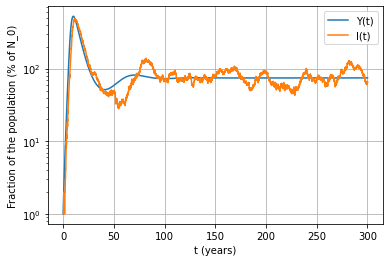

In [48]:
# Defining the SIR model
# Density-dependent transmission 

def sir_model_continous(y, x, beta, gamma, mu, nu, rho, psi):
    S = nu - beta * y[0]* y[1] - mu * y[0] - psi * (y[0]+y[1]*y[2])**0.5
    I = beta * y[0] * y[1] - (gamma + mu)/(1-rho)*y[1] + psi * (y[0]+y[1]*y[2])**0.5
    R = gamma * y[1] - mu * y[2]
    N = y[0] + y[1] + y[2]
    return S, I, R, N

# Defining the parameters 
nu = 1/60
rho = 0

#solving the discrete system
inf, rec, sub, T = Gillespie_direct_algorithm(beta, gamma, mu, psi, N, X, Y, Z, 300)

# Solving the ODEs system

sol = odeint(sir_model_continous,[0.999,0.001 ,0, 1 ], T, (beta, gamma, mu, nu, rho,psi))
S = sol[:, 0]
I = sol[:, 1]
R = sol[:, 2]




# Plot

plt.plot(T, I*1000, label = "Y(t)")
plt.grid()
plt.legend(loc = 'upper right')
plt.xlabel("t (years)")
plt.ylabel("Fraction of the population (% of N_0)")
plt.plot(T,inf, label = "I(t)")
plt.legend()
plt.yscale('log')
plt.show()

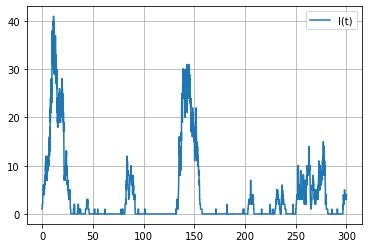

In [56]:
inf, rec, sub, T = Gillespie_direct_algorithm(1, 0.8, 1/70, 5e-3, 1000, 999, 1, 0, 300)
plt.plot(T, inf, label = "I(t)")
plt.grid()
plt.legend()
#plt.yscale('log')
plt.show()

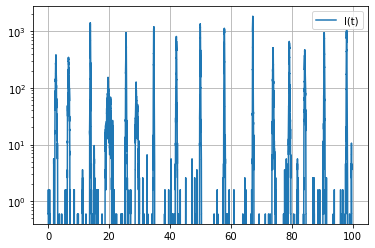

In [152]:
inf, rec, sub, T = Gillespie_direct_algorithm(520, 52, 1/70, 5e-3, 100000, 10000, 6e-1, 90000-(6e-1), 100)
plt.plot(T, inf, label = "I(t)")
plt.grid()
plt.legend()
plt.yscale('log')
plt.show()

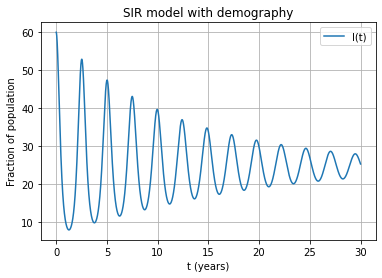

In [151]:
def sir_model_demography(y, x, beta, gamma, mu):
    S = mu - beta * y[0] * y[1] - mu * y[0]
    R = gamma * y[1] - mu * y[2]
    I = beta * y[0] * y[1] - gamma * y[1] - mu * y[1]
    return S, I, R

# Defining the parameters of the system (we are now using a yearly time-scale)

beta = 520
gamma = 52
mu = 1/70
s0 = 0.1
N = 10000 #number of points
T = 30.0 / N #dt
t = np.linspace(0,N*T,N, endpoint = False)

# Solving the ODEs system

sol1 = odeint(sir_model_demography,[0.1, (6*10**-4), (0.9-6*10**-4)], t, (beta,gamma,mu))
S = sol1[:, 0]
I = sol1[:, 1]
R = 1 - S - I

# Plot of the SIR model with demography and R0 > 1

#plt.plot(t,S,label="S(t)")
plt.plot(t,I*100000,label="I(t)")
#plt.plot(t,R,label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("t (years)")
plt.ylabel("Fraction of population")
#plt.yscale('log')
plt.title("SIR model with demography")
plt.show()